In [1]:
from astropy.table import Table, join
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
comsou = Table.read("../data/multiwav-offset-in-Gaia-frame.fits")

In [3]:
def print_median_err(cat_name, ra_err, dec_err, pos_err):
    """
    """
    
    print("{:s}    {:.3f}    {:.3f}    {:.3f}".format(
        cat_name, np.median(ra_err), np.median(dec_err), np.median(pos_err)))

In [4]:
print_median_err("ICRF3  SX", comsou["ra_err_icrf3sx"],
                 comsou["dec_err_icrf3sx"], comsou["pos_err_max_icrf3sx"])
print_median_err("ICRF3   K", comsou["ra_err_icrf3k"],
                 comsou["dec_err_icrf3k"], comsou["pos_err_max_icrf3k"])
print_median_err("ICRF3 XKa", comsou["ra_err_icrf3xka"],
                 comsou["dec_err_icrf3xka"], comsou["pos_err_max_icrf3xka"])
print_median_err("GAIA EDR3", comsou["ra_err_gedr3"], comsou["dec_err_gedr3"],
                 comsou["pos_err_max_gedr3"])

ICRF3  SX    0.045    0.057    0.058
ICRF3   K    0.068    0.132    0.134
ICRF3 XKa    0.068    0.099    0.107
GAIA EDR3    0.146    0.122    0.161


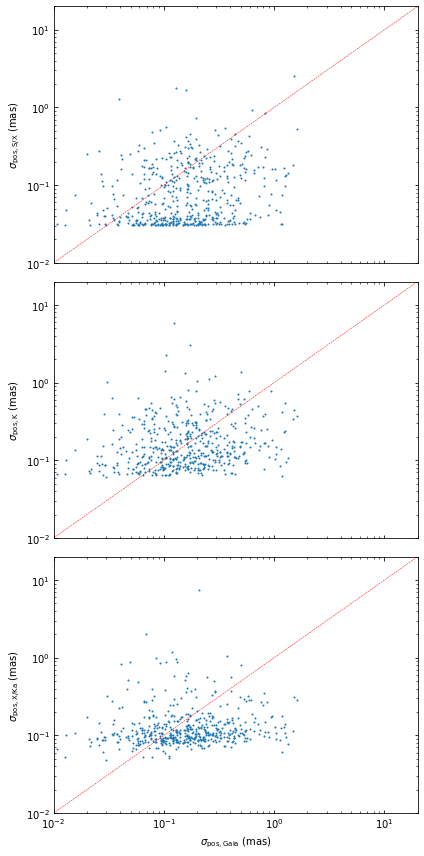

In [5]:
# dRA/ddec vs. R.A./decl. (Gaia-X)
fig, (ax0, ax1, ax2) = plt.subplots(figsize=(6, 12), nrows=3, sharex=True, sharey=True)

ax0.axis([0.01, 20, 0.01, 20])
ax0.plot(comsou["pos_err_max_gedr3"], comsou["pos_err_max_icrf3sx"], ".", ms=2)
ax0.set_xscale("log")
ax0.set_yscale("log")
ax0.set_ylabel("$\\sigma_{\\rm pos, S/X}$ (mas)")

ax1.plot(comsou["pos_err_max_gedr3"], comsou["pos_err_max_icrf3k"], ".", ms=2)
ax1.set_xscale("log")
ax1.set_yscale("log")
ax1.set_ylabel("$\\sigma_{\\rm pos, K}$ (mas)")

ax2.plot(comsou["pos_err_max_gedr3"], comsou["pos_err_max_icrf3xka"], ".", ms=2)
ax2.set_xscale("log")
ax2.set_yscale("log")
ax2.set_ylabel("$\\sigma_{\\rm pos, X/Ka}$ (mas)")
ax2.set_xlabel("$\\sigma_{\\rm pos, Gaia}$ (mas)")

x = np.arange(0.01, 20, 0.1)
ax0.plot(x, x, "r--", lw=0.5)
ax1.plot(x, x, "r--", lw=0.5)
ax2.plot(x, x, "r--", lw=0.5)

plt.tight_layout()